# Analysis

Thi

In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('Clean Obfuscated ATM Data.csv')
df['Terminal DateTime'] = pd.to_datetime(df['Terminal DateTime']) 
df.set_index(df['Terminal DateTime'], inplace=True)
df

,Customer_id,Terminal DateTime,TranType,Term Seq.,Response,Issuer,amount_requested,amount_dispensed,fee_requested,fee_charged
Terminal DateTime,,,,,,,,,,
2020-07-13 16:53:39,7153195435530621939,2020-07-13 16:53:39,W/D,649.0,Liable,PUL,40,40.0,3.0,3.0
2020-07-13 18:02:29,3617705962654528737,2020-07-13 18:02:29,STL,NaN,Approved,NaN,NaN,NaN,0.0,0.0
2020-07-31 01:04:06,7929763781525975567,2020-07-31 01:04:06,W/D,746.0,Liable,MS0,140,140.0,3.0,3.0
2020-07-31 12:28:46,3617705962654528737,2020-07-31 12:28:46,STL,NaN,Approved,NaN,NaN,NaN,0.0,0.0
2020-08-07 18:41:10,3617705962654528737,2020-08-07 18:41:10,STL,NaN,Approved,NaN,NaN,NaN,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
2020-12-06 13:09:11,1190346791087523935,2020-12-06 13:09:11,W/D,1471.0,Approved,SNE,200,200.0,3.0,3.0
2020-12-06 13:10:10,1190346791087523935,2020-12-06 13:10:10,W/D,1472.0,EXC WD L,SNE,200,NaN,0.0,0.0
2021-03-20 05:03:09,2183744640601740186,2021-03-20 05:03:09,W/D,2138.0,Approved,PUL,120,120.0,3.0,3.0


In [89]:

print(f'Sample Start: {df.index.min()}')
print(f'Sample End: {df.index.max()}')
print(f'Total Days: {(df.index.max() - df.index.min()).days}')

Sample Start: 2020-07-06 14:56:06
Sample End: 2021-08-09 23:05:31
Total Days: 399


In [90]:
df.shape
# there were 2751 balance checks and withdrawls and failed withdrawls in this period

(2751, 10)

In [91]:
transaction_df = df[df['fee_charged'] !=0.0] # A subset of all the valid transactions
transaction_df.shape # there were 1562 transactions in this period

(1562, 10)

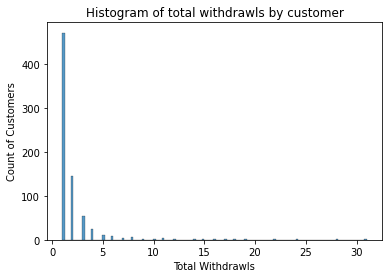

In [92]:
repeat_customers = transaction_df['Customer_id'].value_counts().values
sns.histplot(repeat_customers)
plt.title("Histogram of total withdrawls by customer")
plt.ylabel('Count of Customers')
plt.xlabel('Total Withdrawls')
plt.show()


Most customer only use the ATM once, but there are a handful of customers that have used the ATM many ones

In [93]:
total_unique_customers = len(transaction_df['Customer_id'].unique())

number_of_5_plus_repeat_customers = np.sum(transaction_df['Customer_id'].value_counts() >=5)
number_of_5_plus_repeat_customers

print(f'Percent of customers that have used the ATM 5+ times: {round((number_of_5_plus_repeat_customers/total_unique_customers)*100,2)}%')

Percent of customers that have used the ATM 5+ times: 7.07%


In [94]:
customer_group_df = transaction_df.groupby('Customer_id').sum().sort_values(by='fee_charged', ascending=False)
customer_group_df

,Term Seq.,amount_dispensed,fee_requested,fee_charged
Customer_id,,,,
5160764800030931563,25888.0,3880.0,93.0,93.0
6151147783377518261,46305.0,4620.0,84.0,84.0
3187606172919100028,67084.0,2500.0,69.0,72.0
1079720515450814901,29098.0,4000.0,66.0,66.0
3041864323038578142,44785.0,2260.0,57.0,57.0
...,...,...,...,...
3654563181889187262,2117.0,200.0,3.0,3.0
3721972177733772809,2579.0,40.0,3.0,3.0
3725547917346005929,1003.0,200.0,3.0,3.0


In [95]:
fifty_most_freqent_users = list(customer_group_df.index[:50])

fifty_most_freqent_users

[5160764800030931563,
 6151147783377518261,
 3187606172919100028,
 1079720515450814901,
 3041864323038578142,
 7003115162260689319,
 1190346791087523935,
 3198048075106216964,
 6720380636312730274,
 838626543130318130,
 4191663777944424198,
 2170087134616019330,
 8134964530313524239,
 6904807094660509534,
 4585881769669767800,
 8485294738444938534,
 5360415261703058334,
 8120477730784561281,
 5373019291954705079,
 2183744640601740186,
 875893057560591395,
 2628314885148147830,
 7315706900205045665,
 2253717849722325592,
 7932280326139793801,
 3791178353698124116,
 8022741257523729779,
 9048226873534007821,
 1497912860171747447,
 785089925136888503,
 266959144381456145,
 4968065508133194789,
 2701036743211180653,
 945384404010707044,
 1672407142536526502,
 2041360255540117569,
 3309841820828900521,
 5070993254737909218,
 675549229448692191,
 5192840608297194168,
 1024144443385327747,
 4192974176217531904,
 4592880766075120679,
 1436022832453677282,
 5039472452946960684,
 404666002684069

# What are the patterns in the most frequent users

In [96]:
most_freqent_customers_df = df[df['Customer_id'].isin(fifty_most_freqent_users)]
most_freqent_customers_df.describe()

,Customer_id,Term Seq.,amount_dispensed,fee_requested,fee_charged
count,7.240000e+02,724.000000,568.000000,724.000000,724.000000
mean,4.163474e+18,1889.533149,120.528169,2.158840,2.158840
std,2.502717e+18,729.141689,74.230224,1.348496,1.348496
min,2.669591e+17,631.000000,0.000000,0.000000,0.000000
25%,2.041360e+18,1323.750000,60.000000,0.000000,0.000000
50%,4.046660e+18,1692.500000,100.000000,3.000000,3.000000
75%,6.151148e+18,2435.250000,200.000000,3.000000,3.000000
max,9.048227e+18,3415.000000,200.000000,3.000000,3.000000


<AxesSubplot:xlabel='amount_dispensed', ylabel='amount_requested'>

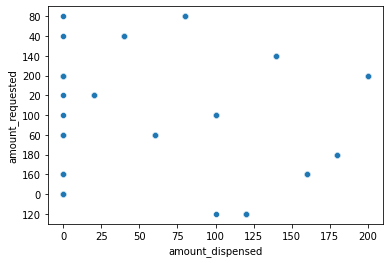

In [97]:
sns.scatterplot(x='amount_dispensed', y='amount_requested', data=most_freqent_customers_df)

Some one tried to withdrawl $800

<AxesSubplot:title={'center':'Histgram of amount_dispensed'}, xlabel='amount_dispensed', ylabel='Count'>

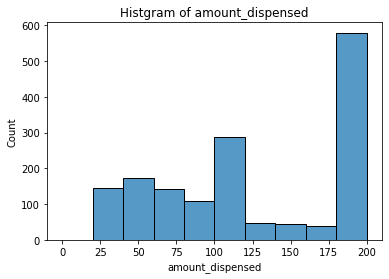

In [98]:
plt.title('Histgram of amount_dispensed')
sns.histplot(transaction_df['amount_dispensed'], bins=[a for  a in range(0,220,20)])

### How does transaction volume change over time?

In [106]:
transaction_df.resample('W').sum() # group by week. 

,Customer_id,Term Seq.,amount_dispensed,fee_requested,fee_charged
Terminal DateTime,,,,,
2020-07-12,1.200668e+20,16082.0,2280.0,78.0,78.0
2020-07-19,1.032318e+20,13925.0,2320.0,63.0,63.0
2020-07-26,1.103993e+20,14625.0,2040.0,63.0,63.0
2020-08-02,1.297704e+20,19343.0,3300.0,78.0,78.0
2020-08-09,1.456498e+20,24835.0,4000.0,93.0,93.0
2020-08-16,9.134489e+19,12538.0,1880.0,45.0,45.0
2020-08-23,2.746435e+19,6888.0,660.0,24.0,24.0
2020-08-30,6.377114e+19,12327.0,1520.0,42.0,42.0
2020-09-06,1.531235e+20,28219.0,3560.0,93.0,93.0
